<a href="https://colab.research.google.com/github/nagae/2020ICL-B/blob/master/Colab%E6%B0%97%E8%B1%A1%E5%BA%81CSV%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%82%92%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%82%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 気象庁からダウンロードした CSV データを Python の変数に読み込む方法

気象庁の[過去の気象データ・ダウンロード](https://www.data.jma.go.jp/gmd/risk/obsdl/index.php)からは，選択した地点・項目・期間に応じた気象データを[CSV形式](https://www.pc-master.jp/sousa/csv.html)のファイルでダウンロードすることができる．
1. 「地点」を選ぶ．ここでは地点を1箇所のみ選択することにしよう．
2. 「項目」を選ぶ．ここでは「データの種類」として「月別値」，「項目」として「月平均気温」と「降水量の月合計」を選択することにしよう．
3. 「期間」を選ぶ．ここでは「連続した期間」として「2019年1月」から「2019年12月」を選択することにしよう．
4. 「CSVファイルをダウンロード」とすれば，`data.csv` といった名前のファイルがダウンロードされる．
![](https://i.imgur.com/hEB47Ae.gif)

以下では，気象庁からダウンロードされたCSVデータが `data.csv` という名前のファイルで自分のPCに保存されているとし，そこから各月の平均気温や総降水量のVデータを Python の変数 `temp` や `prep` に読み込む方法を解説する．



## ダウンロードされたファイルを Colaboratory のファイルシステムにコピー
まず，ダウンロードされたファイルを，Colaboratory のファイルビューワーにドラッグ＆ドロップする．
![](https://i.imgur.com/EhvTZlo.gif)

これで，Colaboratory から `data.csv` にアクセスできるようになる．なお，ここで Colaboratory にコピーされたファイルは，**ランタイム** が切れると消えてしまうので，**オリジナルは常に手許に残しておくこと**．

## Pandas モジュールのインポート
`csv` ファイルを読み込む一番手っ取り早い方法は，データ分析用の**モジュール**である[`pandas`](https://pandas.pydata.org/docs/)の [`read_csv`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) を使うことだ．

以下のセルでは，`pandas` モジュールを `pd` という名前でインポートしている．

In [0]:
import pandas as pd # pandas モジュールを pd という名前でインポート

## データファイルの読み込みと整形
まずは，`pandas` モジュールの機能を使って，`data.csv`ファイルを読み込み，使いやすいように形を整えておこう．

`pandas` モジュールでは，データのかたまりを [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)という**オブジェクト**として扱う．`read_csv`関数を使うと，CSVファイルから読み込んだデータで `DataFrame` の **インスタンス** を生成できる（オブジェクトとかインスタンスとかが良くわからなければ読み飛ばしていい）．

聞き慣れない言葉が続いて嫌になりそうだが，気象庁からダウンロードした CSV ファイルは，[`Shift_JIS`](https://ja.wikipedia.org/wiki/Shift_JIS) という「時代遅れ」な**文字コード**で記述されている．そのため，`data.csv`を読み込む際には，`read_csv`関数に文字コードを指定する `encoding='shift-jis'`という引数を与えてやる必要がある．

In [6]:
df = pd.read_csv('data.csv', encoding='shift-jis') # `data.csv`というファイルから読み込んだデータで df という名前のデータフレームを作る
df # df というデータフレームの中身を表示

,,,,,,,ダウンロードした時刻：2020/05/06 10:16:58
NaN,仙台,仙台,仙台,仙台,仙台,仙台,仙台
年月,平均気温(℃),平均気温(℃),平均気温(℃),降水量の合計(mm),降水量の合計(mm),降水量の合計(mm),降水量の合計(mm)
NaN,NaN,品質情報,均質番号,NaN,現象なし情報,品質情報,均質番号
2019/1,2.4,8,1,4.0,0,8,1
2019/2,3.7,8,1,13.0,0,8,1
2019/3,7.0,8,1,83.0,0,8,1
2019/4,10.2,8,1,90.5,0,8,1
2019/5,17.4,8,1,81.0,0,8,1
2019/6,19.0,8,1,168.5,0,8,1
2019/7,22.4,8,1,111.5,0,8,1


ぱっと見わかり辛いが，このデータフレームの**最初の2行はデータを取り扱う上で必要がない**．具体的には，最初の第0行（行番号は0から数えられることに注意）は，
```
ダウンロードした時刻：2020/04/24 16:17:57
```
と，ダウンロード日時を表しているだけし，第1行も
```
NaN	仙台	仙台	仙台	仙台	仙台	仙台	仙台
```
と，地名を繰り返しているだけ．`NaN`というのは，その**セル**にデータが入っていない（欠損値）を表している．

あと見るように，実際にデータの取扱いで必要となるのは，第2行の
```
年月	平均気温(℃)	平均気温(℃)	平均気温(℃)	降水量の合計(mm)	降水量の合計(mm)	降水量の合計(mm)	降水量の合計(mm)
```
という情報だ．

そこで，`data.csv` の最初の2行（第0行と第1行）を読み飛ばし，第2行を **ヘッダ**（見出し行）に指定して読み込み直そう．

In [8]:
df = pd.read_csv('data.csv', encoding='shift-jis', header=2) # 最初の2行を読み飛ばし，第2行（3行目）をヘッダとして df に読み込む
df # df というデータフレームの中身を表示

,年月,平均気温(℃),平均気温(℃).1,平均気温(℃).2,降水量の合計(mm),降水量の合計(mm).1,降水量の合計(mm).2,降水量の合計(mm).3
0,NaN,NaN,品質情報,均質番号,NaN,現象なし情報,品質情報,均質番号
1,2019/1,2.4,8,1,4.0,0,8,1
2,2019/2,3.7,8,1,13.0,0,8,1
3,2019/3,7.0,8,1,83.0,0,8,1
4,2019/4,10.2,8,1,90.5,0,8,1
5,2019/5,17.4,8,1,81.0,0,8,1
6,2019/6,19.0,8,1,168.5,0,8,1
7,2019/7,22.4,8,1,111.5,0,8,1
8,2019/8,26.2,8,1,88.5,0,8,1
9,2019/9,22.4,8,1,72.5,0,8,1


`data.csv`ファイルの第2行をヘッダとして読み込むことで，かなり扱いやすいデータフレームになった感じがある．

元のファイルで「平均気温(℃)」や「降水量の合計(mm)」のように内容が重複する列については，見出しが「平均気温(℃).1 」や「平均気温(℃).2」のように書き換えられていることに注意されたい． 

さて，見出しはスッキリしたものの，依然として，このデータフレームには，第0行に
```
NaN	NaN	品質情報	均質番号	NaN	現象なし情報	品質情報	均質番号
```
という意味の無い情報しか入っていない．そこで，[`Dataframe.drop`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)を用いて，第0行を削除しておこう．

以上の操作により，だいぶスッキリしたデータフレームに整形できる．

In [10]:
df = df.drop(index=0) # dfの0番目の行を取り除いたデータフレームに df という名前をつけ直す
df # df というデータフレームの中身を表示

,年月,平均気温(℃),平均気温(℃).1,平均気温(℃).2,降水量の合計(mm),降水量の合計(mm).1,降水量の合計(mm).2,降水量の合計(mm).3
1,2019/1,2.4,8,1,4.0,0,8,1
2,2019/2,3.7,8,1,13.0,0,8,1
3,2019/3,7.0,8,1,83.0,0,8,1
4,2019/4,10.2,8,1,90.5,0,8,1
5,2019/5,17.4,8,1,81.0,0,8,1
6,2019/6,19.0,8,1,168.5,0,8,1
7,2019/7,22.4,8,1,111.5,0,8,1
8,2019/8,26.2,8,1,88.5,0,8,1
9,2019/9,22.4,8,1,72.5,0,8,1
10,2019/10,16.9,8,1,644.5,0,8,1


## データフレームの列にアクセス
こうして綺麗に整形されたデータフレーム`df`の各列にアクセスするには，
```
df["平均気温(℃)"]
```
のように，`データフレーム名[列ラベル]` とすればいい．

In [11]:
df["平均気温(℃)"]

1      2.4
2      3.7
3      7.0
4     10.2
5     17.4
6     19.0
7     22.4
8     26.2
9     22.4
10    16.9
11    10.0
12     5.4
Name: 平均気温(℃), dtype: float64

ただし，このままでは `1, 2, ..., 12` という，各行についた**インデックス**までもセットになったもの（正確には`pandas.Series`オブジェクト）であるため，`.values` をつけて，数字の羅列（実際には `numpy.array` オブジェクト）だけを取り出そう．

この辺りは，細かい部分まで正確に理解できなくてもいいので，とにかく使って「馴れ」ていく方がいい．

In [12]:
df["平均気温(℃)"].values

array([ 2.4,  3.7,  7. , 10.2, 17.4, 19. , 22.4, 26.2, 22.4, 16.9, 10. ,
        5.4])

こうして取り出した数値を `temp`と`prep`に代入すれば，手で入力したものと全く同じように使える．

In [20]:
temp = df["平均気温(℃)"].values
prep = df["降水量の合計(mm)"].values
print("temp", temp)
print("prep", prep)

temp [ 2.4  3.7  7.  10.2 17.4 19.  22.4 26.2 22.4 16.9 10.   5.4]
prep [  4.   13.   83.   90.5  81.  168.5 111.5  88.5  72.5 644.5   5.5  27. ]


# グラフに表示してみよう
[グラフの描画](

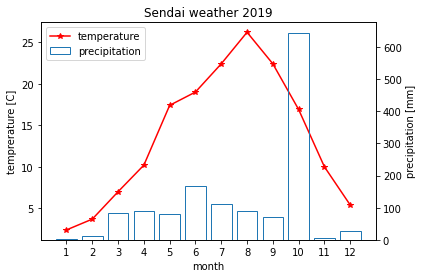

In [19]:
from matplotlib import pyplot as plt
month = range(1,13) # 月を与える

fig, ax1 = plt.subplots() # ax1軸を作るおまじない
ax2 = ax1.twinx() # ax1とx軸を共有するax2軸を作るおまじない

# グラフのプロットと整形
ax1.plot(month, temp, 'r-*', label="temperature") # ax1軸に`plot`関数を用いて各月の平均気温をプロット
ax2.bar(month, prep, color='none', edgecolor='C0', label="precipitation") # ax2軸に降水量を棒グラフでプロット
plt.xticks(month) # x軸の目盛りを月単位にする
plt.title('Sendai weather 2019') # グラフのタイトルを記載
ax1.set_xlabel("month") # x軸のラベル
ax1.set_ylabel("temprerature [C]") # y1軸のラベル
ax2.set_ylabel("precipitation [mm]") # y2軸のラベル

# 以下，凡例のためのおまじない
h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない
plt.show()